In [1]:
import cvxpy as cvx
import numpy as np
import pandas as pd

In [2]:
import  os

import numpy as np
import pandas as pd


from create_df_larger import read_df_larger
df, dfc, all_homes, appliance_min, national_average = read_df_larger()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})
K_min, K_max = 1,6
F_min, F_max=1,8

from all_functions import *
from features_larger import *

In [19]:
appliance=["hvac","fridge"]
if appliance==["hvac"]:
    start, end=5, 11
else:
    start, end = 1, 13

aggregate_cols = ['aggregate_%d' %month for month in range(start, end)]
all_cols = deepcopy(aggregate_cols)
appl_cols = {}
for appl in appliance:
    
    appliance_cols = ['%s_%d' %(appl, month) for month in range(start, end)]
    appl_cols[appl]=appliance_cols
    all_cols.extend(appliance_cols)

#all_cols = deepcopy(appliance_cols)
#all_cols.extend(aggregate_cols)
X_matrix = dfc[all_cols]
    

In [11]:
columns_max = {}
columns_min = {}
col_max = X_matrix.max()
#columns_max[appliance]=col_max
col_min = X_matrix.min()
#columns_min[appliance]=col_min
X_normalised = X_matrix.copy()
for col in X_matrix.columns:
    X_normalised[col] = (X_matrix[col]-col_min[col])/(col_max[col]-col_min[col])


In [12]:
pd.DataFrame(X_normalised).head()

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,...,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,fridge_11,fridge_12
26,0.191176,0.119015,0.139450,0.238250,0.264163,0.451381,0.462876,0.342351,0.318240,0.339887,...,0.245049,0.173357,0.123998,0.132469,0.134570,0.138110,0.142773,0.131445,0.133412,0.114402
59,0.643877,0.514774,0.469548,0.317402,0.314919,0.337543,0.374149,0.323820,0.209625,0.250306,...,0.035376,0.021497,0.016580,0.018194,0.016704,0.016451,0.017461,0.017350,0.019419,0.018023
94,0.043921,0.008329,0.036826,0.073503,0.043213,0.109343,0.102650,0.023547,0.023076,0.055540,...,0.295161,0.176255,0.137199,0.157744,0.158342,0.166106,0.164474,0.151483,0.137560,0.137369
101,0.046441,0.023663,0.031909,0.137671,0.114979,0.220393,0.214252,0.079637,0.106973,0.106339,...,0.176910,0.120821,0.084557,0.094325,0.092146,0.088529,0.088823,0.076076,0.069357,0.057641
222,0.608796,0.528572,0.705696,0.679550,0.790309,0.976471,1.000000,1.000000,0.695549,0.757812,...,0.192632,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df = pd.DataFrame(X_normalised)

In [14]:
df

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,...,fridge_3,fridge_4,fridge_5,fridge_6,fridge_7,fridge_8,fridge_9,fridge_10,fridge_11,fridge_12
26,0.191176,0.119015,0.139450,0.238250,0.264163,0.451381,0.462876,0.342351,0.318240,0.339887,...,0.245049,0.173357,0.123998,0.132469,0.134570,0.138110,0.142773,0.131445,0.133412,0.114402
59,0.643877,0.514774,0.469548,0.317402,0.314919,0.337543,0.374149,0.323820,0.209625,0.250306,...,0.035376,0.021497,0.016580,0.018194,0.016704,0.016451,0.017461,0.017350,0.019419,0.018023
94,0.043921,0.008329,0.036826,0.073503,0.043213,0.109343,0.102650,0.023547,0.023076,0.055540,...,0.295161,0.176255,0.137199,0.157744,0.158342,0.166106,0.164474,0.151483,0.137560,0.137369
101,0.046441,0.023663,0.031909,0.137671,0.114979,0.220393,0.214252,0.079637,0.106973,0.106339,...,0.176910,0.120821,0.084557,0.094325,0.092146,0.088529,0.088823,0.076076,0.069357,0.057641
222,0.608796,0.528572,0.705696,0.679550,0.790309,0.976471,1.000000,1.000000,0.695549,0.757812,...,0.192632,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
252,0.355006,0.312635,0.345354,0.466036,0.531221,0.747189,0.741987,0.570651,0.605162,0.502998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,0.165746,0.141176,0.140974,0.192165,0.245914,0.441337,0.395841,0.248856,0.275310,0.256052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,0.165030,0.145867,0.158861,0.277954,0.306238,0.551074,0.576684,0.414428,0.410604,0.315398,...,0.252436,0.161473,0.119001,0.145383,0.134902,0.136746,0.141420,0.135695,0.119577,0.093748
624,0.198745,0.100141,0.119221,0.105700,0.098029,0.210571,0.180674,0.088194,0.076730,0.089123,...,0.204908,0.129886,0.107599,0.134181,0.131300,0.131292,0.127052,0.120104,0.114376,0.092233
661,0.187602,0.133128,0.166824,0.235341,0.266728,0.493854,0.490906,0.368298,0.385970,0.340996,...,0.210381,0.128213,0.099761,0.121923,0.107828,0.106183,0.108718,0.108627,0.101915,0.096970


In [32]:
out = {}
for appl in appliance:
    out[appl]={}
for appl in appliance:
    for lat in range(2,3):
        out[appl][lat]={}

for lat in range(2,3):   
    
    print lat
    for home in X_normalised.index[:10]:
        
        X_home = X_normalised.copy()
        for appl in appliance:
            for month in range(start, end):
                X_home.loc[home, '%s_%d' %(appl, month)] = np.NAN
        mask = X_home.notnull().values
        # Ensure repeatably random problem data.
        A = X_home.copy()
        X, Y, res = nmf(A, lat, 2)
        
        pred_df = pd.DataFrame(Y*X)
        pred_df.columns = X_normalised.columns
        pred_df.index = X_normalised.index
        #print pred_df
        for appl in appliance:
            out[appl][lat][home] = transform(pred_df.ix[home], appl, col_max, col_min)[appl_cols[appl]]


2


In [33]:
out

{'fridge': {2: {26: fridge_1     54.833238
   fridge_2     51.533975
   fridge_3     59.856808
   fridge_4     66.338276
   fridge_5     71.292983
   fridge_6     71.508899
   fridge_7     75.356909
   fridge_8     76.255795
   fridge_9     72.572017
   fridge_10    72.936986
   fridge_11    64.517029
   fridge_12    63.258040
   Name: 26, dtype: float64, 59: fridge_1      70.119304
   fridge_2      58.496324
   fridge_3      63.018423
   fridge_4      88.516043
   fridge_5     102.078853
   fridge_6      96.550870
   fridge_7      98.070658
   fridge_8      98.011174
   fridge_9      96.306803
   fridge_10     95.106053
   fridge_11     88.348533
   fridge_12     90.324811
   Name: 59, dtype: float64, 94: fridge_1     11.461319
   fridge_2     11.987490
   fridge_3     14.617177
   fridge_4     13.173581
   fridge_5     12.940065
   fridge_6     13.915392
   fridge_7     15.286973
   fridge_8     15.663792
   fridge_9     14.421247
   fridge_10    14.774197
   fridge_11    12.426857
 

In [46]:
appl='hvac'
error_lat = {}
gt = X_matrix[appl_cols[appl]]
for lat in range(2,3):
    
    pr = pd.DataFrame(out[appl][lat]).T
    
    error = (pr-gt).abs()
    error_lat[lat] = error.div(gt).mul(100).median().mean()

In [48]:
pd.Series(error_lat)

2    63.871448
dtype: float64

In [16]:
def nmf(A, k, MAX_ITERS=30):
    np.random.seed(0)

    # Generate random data matrix A.
    m = len(A)
    n = len(A.columns)
    
    
    # Initialize Y randomly.
    Y_init = np.random.rand(m, k)

    # Ensure same initial random Y, rather than generate new one
    # when executing this cell.
    Y = Y_init 

    # Perform alternating minimization.
    
    residual = np.zeros(MAX_ITERS)
    for iter_num in range(1, 1+MAX_ITERS):
        # At the beginning of an iteration, X and Y are NumPy
        # array types, NOT CVXPY variables.

        # For odd iterations, treat Y constant, optimize over X.
        if iter_num % 2 == 1:
            X = cvx.Variable(k, n)
            constraint = [X >= 0]
        # For even iterations, treat X constant, optimize over Y.
        else:
            Y = cvx.Variable(m, k)
            constraint = [Y >= 0]
        Temp = Y*X

        # Solve the problem.
        obj = cvx.Minimize(cvx.norm(A.values[mask] - (Y*X)[mask], 'fro'))
        prob = cvx.Problem(obj, constraint)
        prob.solve(solver=cvx.SCS)

        if prob.status != cvx.OPTIMAL:
            pass
            #return X.value, Y.value, residual
            #raise Exception("Solver did not converge!")

        #print 'Iteration {}, residual norm {}'.format(iter_num, prob.value)
        residual[iter_num-1] = prob.value

        # Convert variable to NumPy array constant for next iteration.
        if iter_num % 2 == 1:
            X = X.value
        else:
            Y = Y.value
    return X, Y, residual

In [54]:
prob.status

'optimal'

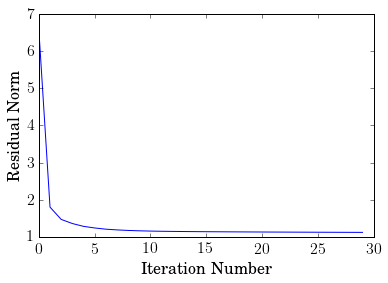

Original matrix:
        hvac_5    hvac_6    hvac_7    hvac_8    hvac_9   hvac_10  aggregate_5  \
26         NaN       NaN       NaN       NaN       NaN       NaN     0.264163   
59    0.083667  0.141433  0.211260  0.374507  0.151210  0.083204     0.314919   
94    0.018833  0.046446  0.054788  0.073571  0.038679  0.028250     0.043213   
101   0.211989  0.233945  0.213504  0.255734  0.230129  0.211738     0.114979   
222   0.534035  0.646650  0.503590  0.616900  0.629034  0.663339     0.790309   
364   0.262441  0.385219  0.342594  0.457073  0.447491  0.426416     0.245914   
545   0.389795  0.561114  0.497692  0.606508  0.555478  0.422386     0.306238   
624   0.078196  0.136574  0.140541  0.202991  0.147672  0.015232     0.098029   
661   0.245238  0.467515  0.439553  0.578096  0.531963  0.450393     0.266728   
871   0.090979  0.165842  0.185541  0.272096  0.207023  0.152141     0.132008   
946   0.240927  0.321466  0.280712  0.364962  0.305803  0.276486     0.123545   
1169  0.020

In [55]:
import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# Set plot properties.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

#
# Print results.
#
print 'Original matrix:'
print A
print 'Left factor Y:'
print Y
print 'Right factor X:'
print X
print 'Residual A - Y * X:'
print A - Y * X
print 'Residual after {} iterations: {}'.format(iter_num, prob.value)

In [21]:
def transform(pred_df,appliance,  col_max, col_min):
    pred_df_copy = pred_df.copy()
    if appliance=="hvac":
        start, stop=5, 11
    else:
        start, stop=1, 13
    
    for month in range(start, stop):
        pred_df_copy['%s_%d' %(appliance,month)] = (col_max['%s_%d' %(appliance, month)]-col_min['%s_%d' %(appliance,month)])*pred_df['%s_%d'%(appliance,month)] +col_min['%s_%d' %(appliance,month)]
    return pred_df_copy

In [74]:
transform(pred_df.ix[26], 'hvac', col_max, col_min)[appliance_cols]

hvac_5     227.844843
hvac_6     537.381419
hvac_7     771.769991
hvac_8     936.052200
hvac_9     653.705150
hvac_10    321.603356
Name: 26, dtype: float64

In [72]:
X_matrix.ix[26]

hvac_5           242.395737
hvac_6           543.781433
hvac_7           761.394043
hvac_8           902.418823
hvac_9           610.035828
hvac_10          395.169098
aggregate_5      958.539734
aggregate_6     1381.666504
aggregate_7     1705.293091
aggregate_8     1887.754883
aggregate_9     1365.123535
aggregate_10    1197.380859
Name: 26, dtype: float64